In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.model_selection import cross_val_score, KFold, train_test_split

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../Data/cleaned_flight_dataset.csv')

In [3]:
df.head()

,airline,from,stop,to,price,Class,Flight code,time_taken(min)
0,SpiceJet,Delhi,0,Mumbai,5953.0,Economy,SG-8709,130.0
1,SpiceJet,Delhi,0,Mumbai,5953.0,Economy,SG-8157,140.0
2,AirAsia,Delhi,0,Mumbai,5956.0,Economy,I5-764,130.0
3,Vistara,Delhi,0,Mumbai,5955.0,Economy,UK-995,135.0
4,Vistara,Delhi,0,Mumbai,5955.0,Economy,UK-963,140.0


In [4]:
df.drop(columns = ['Flight code'], axis = 1, inplace = True)

In [5]:
df.head()

,airline,from,stop,to,price,Class,time_taken(min)
0,SpiceJet,Delhi,0,Mumbai,5953.0,Economy,130.0
1,SpiceJet,Delhi,0,Mumbai,5953.0,Economy,140.0
2,AirAsia,Delhi,0,Mumbai,5956.0,Economy,130.0
3,Vistara,Delhi,0,Mumbai,5955.0,Economy,135.0
4,Vistara,Delhi,0,Mumbai,5955.0,Economy,140.0


In [6]:
df.shape

(69244, 7)

In [12]:
x = pd.get_dummies(data = df[['airline', 'from', 'to', 'Class']], drop_first = True)

In [13]:
df = pd.concat([df, x], axis = 1)

In [14]:
df.head()

,airline,from,stop,to,price,Class,time_taken(min),airline_AirAsia,airline_GO FIRST,airline_Indigo,...,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,Class_Economy
0,SpiceJet,Delhi,0,Mumbai,5953.0,Economy,130.0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,SpiceJet,Delhi,0,Mumbai,5953.0,Economy,140.0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
2,AirAsia,Delhi,0,Mumbai,5956.0,Economy,130.0,1,0,0,...,1,0,0,0,0,0,0,0,1,1
3,Vistara,Delhi,0,Mumbai,5955.0,Economy,135.0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,Vistara,Delhi,0,Mumbai,5955.0,Economy,140.0,0,0,0,...,1,0,0,0,0,0,0,0,1,1


In [15]:
df.drop(columns = ['airline', 'from', 'to', 'Class'], axis = 1, inplace = True)

In [16]:
df.head()

,stop,price,time_taken(min),airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,Class_Economy
0,0,5953.0,130.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
1,0,5953.0,140.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
2,0,5956.0,130.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
3,0,5955.0,135.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
4,0,5955.0,140.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1


## Split data

In [18]:
X = df.drop(columns = ['price'])
y = df['price']

In [19]:
X.head()

,stop,time_taken(min),airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,Class_Economy
0,0,130.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
1,0,140.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
2,0,130.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
3,0,135.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1
4,0,140.0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1


In [20]:
y.head()

0    5953.0
1    5953.0
2    5956.0
3    5955.0
4    5955.0
Name: price, dtype: float64

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 6, train_size = 0.8, shuffle = True)

In [22]:
sc = StandardScaler()
sc.fit(X_train)

StandardScaler()

In [23]:
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Model building

In [24]:
kf = KFold(n_splits = 5, shuffle = True)

In [58]:
def model_building(x_train, y_train, x_test, y_test, model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f"{model}")
    
    print("For training data :")
    print(f"R2 score : {r2_score(y_train, y_train_pred)}")
    print(f"MAE score : {mean_absolute_error(y_train, y_train_pred)}")
    print(f"MSE score : {mean_squared_error(y_train, y_train_pred)}")
    print(f"SMSE score : {np.sqrt(mean_squared_error(y_train, y_train_pred))}")
    print('\n \n')
    
    print("For training data :")
    print(f"R2 score : {r2_score(y_test, y_test_pred)}")
    print(f"MAE score : {mean_absolute_error(y_test, y_test_pred)}")
    print(f"MSE score : {mean_squared_error(y_test, y_test_pred)}")
    print(f"SMSE score : {np.sqrt(mean_squared_error(y_test, y_test_pred))}")
    
    
    print('\n \n')
    print("+" * 120)

In [59]:
models = {
    'lr' : LinearRegression(),
    'knr' : KNeighborsRegressor(),
    'Dtr' : DecisionTreeRegressor(),
    'Rfr' : RandomForestRegressor()
}

In [60]:
for i in range(len(list(models.keys()))):
    model = list(models.values())[i]
    
    model_building(X_train, y_train, X_test, y_test, model)

LinearRegression()
For training data :
R2 score : 0.8757727191034194
MAE score : 4835.827562793761
MSE score : 52510210.67095411
SMSE score : 7246.392942074982

 

For training data :
R2 score : 0.8798530347956459
MAE score : 4749.363255245933
MSE score : 50367828.09804567
SMSE score : 7097.029526361411

 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
KNeighborsRegressor()
For training data :
R2 score : 0.8847718513793998
MAE score : 4830.58274212474
MSE score : 48706325.338706374
SMSE score : 6978.991713614967

 

For training data :
R2 score : 0.8846589695698457
MAE score : 4784.622702000144
MSE score : 48353091.42828796
SMSE score : 6953.638718562243

 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
DecisionTreeRegressor()
For training data :
R2 score : 0.9023455297059647
MAE score : 4385.2396709581335
MSE score : 41278025.01263124
SM

In [66]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [67]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [68]:
print("For training data :")
print(f"R2 score : {r2_score(y_train, y_train_pred)}")
print(f"MAE score : {mean_absolute_error(y_train, y_train_pred)}")
print(f"MSE score : {mean_squared_error(y_train, y_train_pred)}")
print(f"SMSE score : {np.sqrt(mean_squared_error(y_train, y_train_pred))}")
print('\n \n')
    
print("For training data :")
print(f"R2 score : {r2_score(y_test, y_test_pred)}")
print(f"MAE score : {mean_absolute_error(y_test, y_test_pred)}")
print(f"MSE score : {mean_squared_error(y_test, y_test_pred)}")
print(f"SMSE score : {np.sqrt(mean_squared_error(y_test, y_test_pred))}")

For training data :
R2 score : 0.9023402423356829
MAE score : 4385.237070939441
MSE score : 41280259.95591735
SMSE score : 6424.9715918373795

 

For training data :
R2 score : 0.902041636346465
MAE score : 4373.232290499813
MSE score : 41065956.28840976
SMSE score : 6408.272488620452


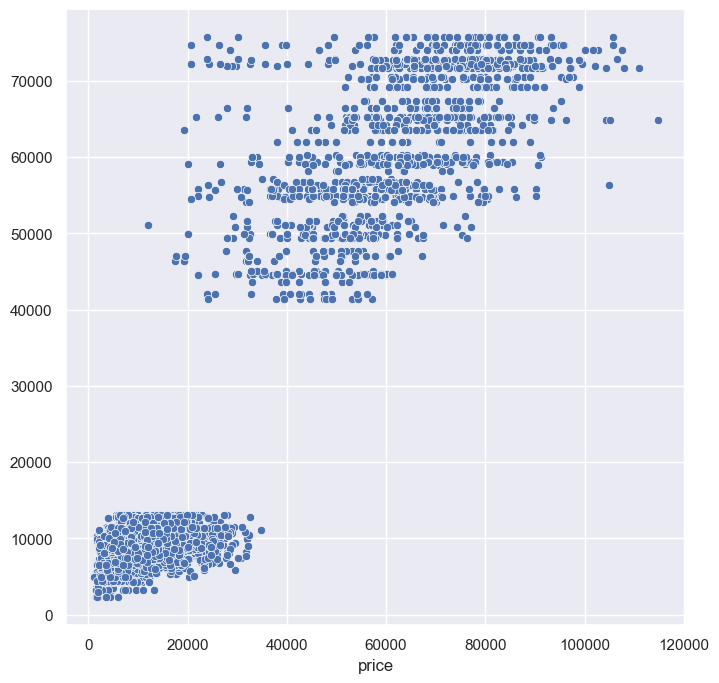

In [83]:
sns.set()
plt.figure(figsize = (8, 8))
sns.scatterplot(x = y_test, y = y_test_pred)
plt.show()